## Vanishing Gradient Problem in Deep Learning

- When training deep neural networks, the gradients (the partial derivatives used to update weights) can become extremely small—especially in the layers near the network's input. This phenomenon is known as the vanishing gradient problem. When gradients vanish, the early layers receive minimal updates during backpropagation, which hampers their ability to learn useful features.

- To read More [Click Here!](https://www.engati.com/glossary/vanishing-gradient-problem#:~:text=exploding%20gradient%20problem%3F-,What%20is%20vanishing%20gradient%20problem%3F,layers%20to%20the%20earlier%20layers.)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow.keras'

In [13]:
print(tf.__version__)

2.19.0


In [2]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

In [3]:
x = [5, 9, 6]

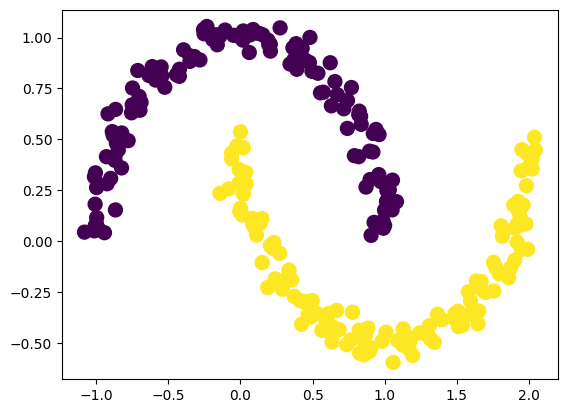

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.show()

### Complex Architecture DNN with one epoch

In [5]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [8]:
# Weights of the first layer
model.get_weights()[0]

array([[-0.26767766, -0.03022301, -0.05338001, -0.6961597 ,  0.01714045,
        -0.48918766, -0.49480128,  0.4130109 ,  0.07529771,  0.6337896 ],
       [ 0.6460094 , -0.09257489, -0.02003205, -0.4872808 , -0.00296563,
         0.60215   ,  0.40167028,  0.47839755,  0.13816243, -0.01148856]],
      dtype=float32)

In [9]:
old_weights = model.get_weights()[0]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

#### Running just for one epoch

In [11]:
model.fit(X_train, y_train, epochs=1)

AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
model.optimizer.get_config()["learning_rate"]

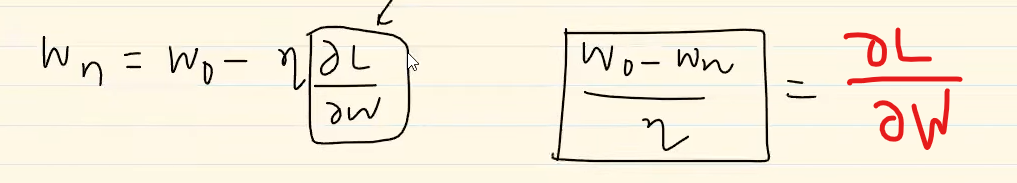

In [ ]:
# Calculate the gradients for each weight of the first layer
gradient = (old_weights - new_weights) / 0.001

# % change in new weights from old weights

percent_change = abs(100*(old_weights - new_weights) / old_weights)

In [ ]:
gradient

In [ ]:
percent_change

#### Notice how small the changes actually are in new_weights

In [ ]:
old_weights

In [ ]:
new_weights

### Running for more Numbers of epochs

In [ ]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
old_weights = model.get_weights()[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [ ]:
model.fit(X_train, y_train, epochs=100)

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
model.optimizer.get_config()["learning_rate"]

In [ ]:
gradient = (old_weights - new_weights) / 0.001
percent_change = abs(100*(old_weights - new_weights) / old_weights)

In [ ]:
gradient

In [ ]:
percent_change

#### Comparing old_weights and new_weights, we can see the changes are still pretty minor even for large Number of epochs

In [ ]:
old_weights

In [ ]:
new_weights

## How to solve Vanishing Gradient Problem?

### 1. Use a less complex DNN architecture

In [ ]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
old_weights = model.get_weights()[0]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

model.fit(X_train, y_train, epochs=100)

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
model.optimizer.get_config()["learning_rate"]

In [ ]:
gradient = (old_weights - new_weights) / 0.001
percent_change = abs(100*(old_weights - new_weights) / old_weights)

In [ ]:
gradient

In [ ]:
percent_change

#### we can see massive changes in weights, for a simple model.

In [ ]:
old_weights

In [ ]:
new_weights

### 2. use ReLU as activation function
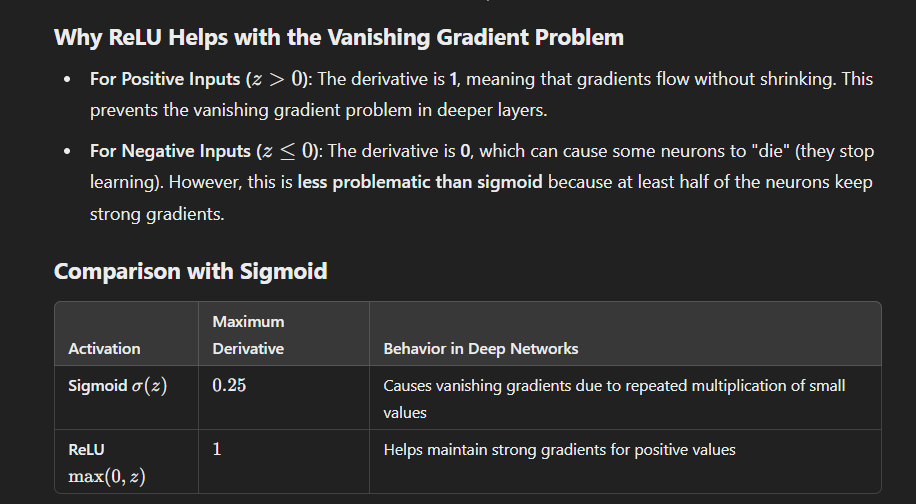

In [ ]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

old_weights = model.get_weights()[0]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

model.fit(X_train, y_train, epochs=100)

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
model.optimizer.get_config()["learning_rate"]

In [ ]:
percent_change = abs(100*(old_weights - new_weights) / old_weights)

#### See the changes in the weights

In [ ]:
old_weights

In [ ]:
new_weights

In [ ]:
percent_change

### 3. Proper Weight Initialization
    - Since the vanishing gradient problem is linked to weight initialization, choosing the right strategy is crucial.
    - Xavier (Glorot) Initialization, He Initialization

### 4. Batch Normalization
    - Normalizes activations of each layer so they have mean 0 and standard deviation 1.
### 5. Residual Networks
    - Introduces skip (shortcut) connections
    - Effect: Allows gradients to bypass certain layers, preventing them from vanishing.